**Project Description:**

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

Key attributes of the database. The database includes the following indicators:
    
    • `country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]

    • `country_long` (text): longer form of the country designation

    • `name` (text): name or title of the power plant, generally in Romanized form

    • `gppd_idnr` (text): 10 or 12 character identifier for the power plant

    • `capacity_mw` (number): electrical generating capacity in megawatts

    • `latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

    • `longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

    • `primary_fuel` (text): energy source used in primary electricity generation or export

    • `other_fuel1` (text): energy source used in electricity generation or export

    • `other_fuel2` (text): energy source used in electricity generation or export

    • `other_fuel3` (text): energy source used in electricity generation or export

    •  `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available

    • `owner` (text): majority shareholder of the power plant, generally in Romanized form

    • `source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form

    • `url` (text): web document corresponding to the `source` field

    • `geolocation_source` (text): attribution for geolocation information

    • `wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.

    • `year_of_capacity_data` (number): year the capacity information was reported

    • `generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013

    • `generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014

    • `generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015

    • `generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016

    • `generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017

    • `generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018

    • `generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019

    • `generation_data_source` (text): attribution for the reported generation information

    • `estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013

    • `estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014

    • `estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015

    • `estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016

    • `estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017

    • 'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013

    • `estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014

    • `estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015

    • `estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016

    • `estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017

Fuel Type Aggregation

We define the "Fuel Type" attribute of our database based on common fuel categories.

Prediction :   Make two prediction

1) Primary Fuel
2) capacity_mw

Dataset Link-

https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv

In [1]:
# IMPORT LIBRARIES

import pandas as pd
import matplotlib.pyplot as mp
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from scipy import stats as sp

In [2]:
# read & store the data in DF

df_raw = pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
df_raw.head(3)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# NON GRAPHICAL ANALYSIS

In [3]:
# Shape of the dataset
print("Rows, column",df_raw.shape)

# Finding the number of unique values in a column

for index in df_raw.columns.to_list():
  print(index,':', df_raw[index].nunique(), ', type:',df_raw[index].dtype, ', Null Count:',df_raw[index].isnull().sum())


Rows, column (907, 27)
country : 1 , type: object , Null Count: 0
country_long : 1 , type: object , Null Count: 0
name : 907 , type: object , Null Count: 0
gppd_idnr : 907 , type: object , Null Count: 0
capacity_mw : 361 , type: float64 , Null Count: 0
latitude : 836 , type: float64 , Null Count: 46
longitude : 827 , type: float64 , Null Count: 46
primary_fuel : 8 , type: object , Null Count: 0
other_fuel1 : 3 , type: object , Null Count: 709
other_fuel2 : 1 , type: object , Null Count: 906
other_fuel3 : 0 , type: float64 , Null Count: 907
commissioning_year : 73 , type: float64 , Null Count: 380
owner : 280 , type: object , Null Count: 565
source : 191 , type: object , Null Count: 0
url : 304 , type: object , Null Count: 0
geolocation_source : 3 , type: object , Null Count: 19
wepp_id : 0 , type: float64 , Null Count: 907
year_of_capacity_data : 1 , type: float64 , Null Count: 388
generation_gwh_2013 : 0 , type: float64 , Null Count: 907
generation_gwh_2014 : 371 , type: float64 , Nul

Rows: 907, columns : 27

Country, country_long has only 1 value throughout, ie, constant can be dropped

Name, gpp_id  has all different values can be considered as unique Identifiers can be dropped

other_fuel3, wepp_id, generation_gwh_2013, generation_gwh_2019, estimated_generation_gwh : Has all null values can be dropped

other_fuel2 : has all null values except 1 entry can be dropped


In [4]:
label_drop_list = ['country','country_long', 'name', 'gppd_idnr','other_fuel2','other_fuel3','wepp_id','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh']

df_raw.drop(label_drop_list, axis=1, inplace = True)

print(df_raw.shape)


(907, 17)




1. Owner, source, url can be dropped.
2. other fuel type1 can be dropped as more than 75% values are null

In [5]:
lab_drop_list2 = ['owner','source', 'url','other_fuel1']

df_raw.drop(lab_drop_list2, axis=1, inplace = True)

print(df_raw.shape)

df_raw.sample(3)

(907, 13)


,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
223,468.57,17.0386,82.1286,Gas,2008.0,WRI,2019.0,0.0,100.65,0.0,0.0,0.0,Central Electricity Authority
362,12.00,15.3160,76.2507,Coal,NaN,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
833,24.00,9.9621,77.3709,Wind,NaN,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN


1. Continous Numeric Labels : capacity_mw, latitude, longitude, generation_gwh_2014/15/16/17/18,

2. Categorical: primary_fuel, other_fuel1, geolocation_source, generation_data_source, commissioning_year

In [6]:
# Shape of the dataset
print("Rows, column",df_raw.shape)

# Finding the number of unique values in a column

for index in df_raw.columns.to_list():
  print(index,':', df_raw[index].nunique(), ', type:',df_raw[index].dtype, ', Null Count:',df_raw[index].isnull().sum())

Rows, column (907, 13)
capacity_mw : 361 , type: float64 , Null Count: 0
latitude : 836 , type: float64 , Null Count: 46
longitude : 827 , type: float64 , Null Count: 46
primary_fuel : 8 , type: object , Null Count: 0
commissioning_year : 73 , type: float64 , Null Count: 380
geolocation_source : 3 , type: object , Null Count: 19
year_of_capacity_data : 1 , type: float64 , Null Count: 388
generation_gwh_2014 : 371 , type: float64 , Null Count: 509
generation_gwh_2015 : 396 , type: float64 , Null Count: 485
generation_gwh_2016 : 403 , type: float64 , Null Count: 473
generation_gwh_2017 : 408 , type: float64 , Null Count: 467
generation_gwh_2018 : 410 , type: float64 , Null Count: 459
generation_data_source : 1 , type: object , Null Count: 458


*Continous Numeric Labels:*

capacity_mw, latitude, longitude, commissioning_year, generation_gwh_2014/15/16/17/18

*Categorical labels* :

primary_fuel, other_fuel1, geolocation_source, year_of_capacity_data, generation_data_source

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   capacity_mw             907 non-null    float64
 1   latitude                861 non-null    float64
 2   longitude               861 non-null    float64
 3   primary_fuel            907 non-null    object 
 4   commissioning_year      527 non-null    float64
 5   geolocation_source      888 non-null    object 
 6   year_of_capacity_data   519 non-null    float64
 7   generation_gwh_2014     398 non-null    float64
 8   generation_gwh_2015     422 non-null    float64
 9   generation_gwh_2016     434 non-null    float64
 10  generation_gwh_2017     440 non-null    float64
 11  generation_gwh_2018     448 non-null    float64
 12  generation_data_source  449 non-null    object 
dtypes: float64(10), object(3)
memory usage: 92.2+ KB


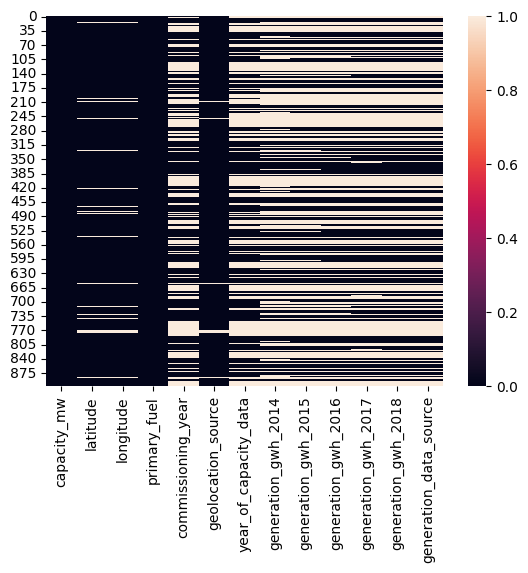

In [7]:
# Visualize null values via Heat Map

sns.heatmap(df_raw.isnull())

df_raw.info()

*Most of the Label has null values*

**Applying Label Encoder in Categorical Labels:**

*This will help to treat null values as unknown/other*

In [8]:
# Applying Label Encoder on categorical data (Object)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df_raw['year_of_capacity_data'] = le.fit_transform(df_raw['year_of_capacity_data'])
df_raw['generation_data_source'] = le.fit_transform(df_raw['generation_data_source'])
df_raw['geolocation_source'] = le.fit_transform(df_raw['geolocation_source'])
df_raw['commissioning_year'] = le.fit_transform(df_raw['commissioning_year'])
df_raw['primary_fuel'] = le.fit_transform(df_raw['primary_fuel'])

In [9]:
df_raw.sample(3)

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
13,16.95,31.2412,77.8769,3,40,2,0,NaN,NaN,NaN,NaN,NaN,1
693,500.00,23.6013,86.4666,1,63,2,0,3125.740,3378.12000,3364.4200,2693.4170,3245.6720,0
641,600.00,32.4404,75.7305,3,54,2,0,1853.486,1947.48365,1299.5496,1794.4029,1447.2474,0


In [10]:
df_raw.isnull().sum()

capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
commissioning_year          0
geolocation_source          0
year_of_capacity_data       0
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source      0
dtype: int64

**Treating Null Values in latitude, longitude, commissioning_year, generation_gwh_2014/15/16/17/18**

Will use Random Forest Regression to find missing null values

In [11]:
# Import Libraries needed

import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [12]:
# Treating Null values in remaining columns
null_col = ['latitude','longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']


# Function to replace null with estimated value by RFR
def fill_na_rgr(col_name, n_null):

  # Split data into known and unknown

  known_dt = df_raw[df_raw[col_name].notnull()]  # Rows with known values
  unknown_dt = df_raw[df_raw[col_name].isnull()]  # Rows with missing values

  # Select features and target

  y = known_dt[col_name]  # Target
  X = known_dt.drop(n_null, axis=1)  # Features


  # Train the Random Forest classifier

  rf_rgr = RandomForestRegressor(n_estimators=100, random_state=42)
  rf_rgr.fit(X, y)

  # Predict missing values
  X_unknown = unknown_dt.drop(n_null, axis=1)  # Features for unknown data
  missing_values = rf_rgr.predict(X_unknown)

  # Update the dataset with imputed values
  df_raw.loc[df_raw[col_name].isnull(), col_name] = missing_values


In [13]:
# Run the function to replace missing values

for clm in null_col:
  fill_na_rgr(clm, null_col)

In [14]:
# Check Info of the dataset

df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   capacity_mw             907 non-null    float64
 1   latitude                907 non-null    float64
 2   longitude               907 non-null    float64
 3   primary_fuel            907 non-null    int64  
 4   commissioning_year      907 non-null    int64  
 5   geolocation_source      907 non-null    int64  
 6   year_of_capacity_data   907 non-null    int64  
 7   generation_gwh_2014     907 non-null    float64
 8   generation_gwh_2015     907 non-null    float64
 9   generation_gwh_2016     907 non-null    float64
 10  generation_gwh_2017     907 non-null    float64
 11  generation_gwh_2018     907 non-null    float64
 12  generation_data_source  907 non-null    int64  
dtypes: float64(8), int64(5)
memory usage: 92.2 KB


**Null values have been handled, no null values present now in any of the labels**

Checking count of distinct value

In [15]:
# Finding the number of unique values in a column

for index in df_raw.columns.to_list():
  print(index,':', df_raw[index].nunique(), ', type:',df_raw[index].dtype, ', Null Count:',df_raw[index].isnull().sum())

capacity_mw : 361 , type: float64 , Null Count: 0
latitude : 879 , type: float64 , Null Count: 0
longitude : 870 , type: float64 , Null Count: 0
primary_fuel : 8 , type: int64 , Null Count: 0
commissioning_year : 74 , type: int64 , Null Count: 0
geolocation_source : 4 , type: int64 , Null Count: 0
year_of_capacity_data : 2 , type: int64 , Null Count: 0
generation_gwh_2014 : 533 , type: float64 , Null Count: 0
generation_gwh_2015 : 543 , type: float64 , Null Count: 0
generation_gwh_2016 : 539 , type: float64 , Null Count: 0
generation_gwh_2017 : 547 , type: float64 , Null Count: 0
generation_gwh_2018 : 538 , type: float64 , Null Count: 0
generation_data_source : 2 , type: int64 , Null Count: 0


1. capacity_mw, latitude, longitude, comissioning_year, generation_gwh_2014/15/16/17/18 are continous numerical data

2. primary_fuel, other_fuel1, geolocation_source, year_of_capacity_data, generation_data_source are categorical data




Checking distribution of target label : Primary_Fuel

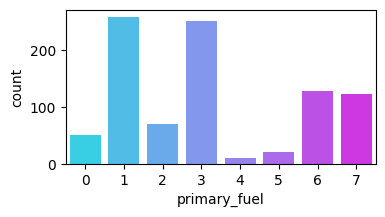

1    258
3    251
6    127
7    123
2     69
0     50
5     20
4      9
Name: primary_fuel, dtype: int64


In [16]:
# Check Distribution of the target label

mp.figure(figsize=(4,2))
sns.countplot(x=df_raw['primary_fuel'], palette = 'cool')
mp.show()

print(df_raw['primary_fuel'].value_counts())

*Data is imbalanced*

**Applying SMOTE to balance the data**

In [17]:
# Import & apply SMOTE

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42, sampling_strategy='auto', k_neighbors=3)
X = df_raw.drop('primary_fuel', axis=1)
y = df_raw['primary_fuel']

print(X.shape)
print(y.shape)

X_resampled, y_resampled = smote.fit_resample(X, y)

print(X_resampled.shape)
print(y_resampled.shape)


df_pf_bl = pd.DataFrame(data = X_resampled, columns = df_raw.columns.to_list())
df_pf_bl['primary_fuel'] = y_resampled

print(df_pf_bl.shape)

df_pf_bl.head(4)

(907, 12)
(907,)
(2064, 12)
(2064,)
(2064, 13)


,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,2.5,28.1839,73.2407,6,65,1,1,7.600373,10.565057,5.659460,3.170767,10.969079,1
1,98.0,24.7663,74.6090,1,73,2,1,146.155507,144.668632,234.033512,270.601274,426.725213,1
2,39.2,21.9038,69.3732,7,73,2,1,39.259963,68.970667,42.100682,88.377423,84.743439,1
3,135.0,23.8712,91.3602,2,58,2,0,617.789264,843.747000,886.004428,663.774500,626.239128,0


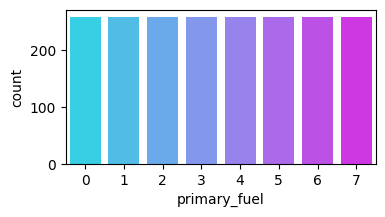

6    258
1    258
7    258
2    258
3    258
0    258
5    258
4    258
Name: primary_fuel, dtype: int64


In [18]:
# Check the distribution of balanced data

mp.figure(figsize=(4,2))
sns.countplot(x=df_pf_bl['primary_fuel'], palette = 'cool')
mp.show()

print(df_pf_bl['primary_fuel'].value_counts())

*Now the data is balanced*

**CHECKING STATISTICAL SUMMARY**

In [19]:
df_pf_bl.describe()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
count,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000
mean,299.038768,19.963263,76.580970,3.500000,61.774225,1.772287,0.470930,1059.155185,1032.555440,1066.552351,1160.043967,1166.979720,0.506783
std,520.384791,5.675576,4.260599,2.291843,14.434078,0.660856,0.499275,2385.305616,2502.480297,2557.385808,2645.271450,2708.135731,0.500075
min,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.982551,16.310050,73.975946,1.750000,53.000000,2.000000,0.000000,32.237369,13.333869,7.932161,24.655503,34.409189,0.000000
50%,59.685489,19.531196,75.881828,3.500000,69.000000,2.000000,0.000000,86.346379,66.220734,42.062604,78.942840,105.063671,1.000000
75%,368.367511,23.837610,77.904392,5.250000,73.000000,2.000000,1.000000,792.171663,763.809109,667.201505,615.578038,670.618579,1.000000
max,4760.000000,34.649000,95.408000,7.000000,73.000000,3.000000,1.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,1.000000


High Std deviation in continous numerical datatype

Taget Label : primary_fuel

# GRAPHICAL ANALYSIS

**Univariate**

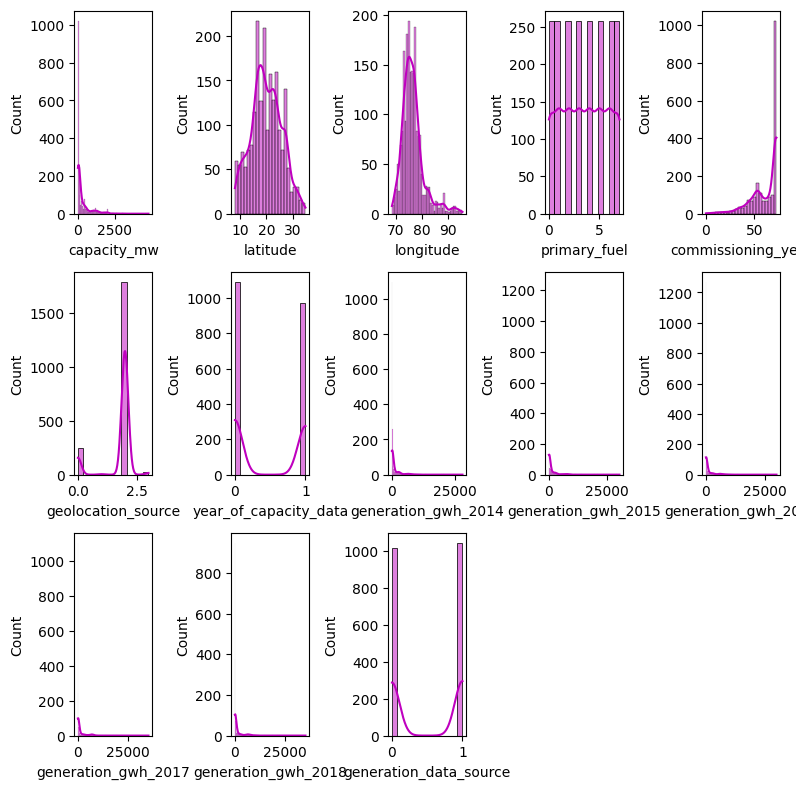

In [20]:
# Histplot to check distribution

mp.figure(figsize=(8,8))
pnum = 1

for index in df_pf_bl.columns.to_list():
  if(pnum<=14):
    ax = mp.subplot(3,5, pnum)
    sns.histplot(df_pf_bl[index], kde = True, color = 'm')
    mp.xlabel(index)
  pnum = pnum+1

mp.tight_layout()
mp.show()

In [21]:
# Applying Robust Scalar

from sklearn.preprocessing import RobustScaler

# Create a RobustScaler object
scaler = RobustScaler()

# Columns to Scale
columns_to_scale = ['capacity_mw','latitude','longitude', 'generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']

# Create a DataFrame containing with selected columns
df_pf_feat = df_pf_bl[columns_to_scale]

# Scaleing
df_pf_sca = pd.DataFrame(scaler.fit_transform(df_pf_feat), columns=columns_to_scale)

# Reset the index of df_raw
df_pf_bl.reset_index(drop=True, inplace=True)

# Replace scaled columns
df_pf_bl[columns_to_scale] = df_pf_sca

# Print information about the scaled DataFrame and check for NaN values and standard deviations
print(df_pf_bl.shape)
print(df_pf_bl.isnull().sum())
print(df_pf_bl.std())

(2064, 13)
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
commissioning_year        0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    0
dtype: int64
capacity_mw                1.493706
latitude                   0.753973
longitude                  1.084551
primary_fuel               2.291843
commissioning_year        14.434078
geolocation_source         0.660856
year_of_capacity_data      0.499275
generation_gwh_2014        3.138831
generation_gwh_2015        3.334527
generation_gwh_2016        3.879121
generation_gwh_2017        4.476511
generation_gwh_2018        4.256674
generation_data_source     0.500075
dtype: float64


*Continous Numerical Labels are scaled now, checking std deviation*

In [22]:
df_pf_bl.describe()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
count,2064.000000,2.064000e+03,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2064.000000,2.064000e+03,2064.000000,2.064000e+03,2064.000000,2064.000000
mean,0.687037,5.739805e-02,0.177969,3.500000,61.774225,1.772287,0.470930,1.280122,1.287630e+00,1.553978,1.829514e+00,1.669130,0.506783
std,1.493706,7.539730e-01,1.084551,2.291843,14.434078,0.660856,0.499275,3.138831,3.334527e+00,3.879121,4.476511e+00,4.256674,0.500075
min,-0.171321,-1.509426e+00,-1.842237,0.000000,0.000000,0.000000,0.000000,-0.113623,-8.823840e-02,-0.063802,-1.335925e-01,-0.165140,0.000000
25%,-0.113963,-4.279137e-01,-0.485149,1.750000,53.000000,2.000000,0.000000,-0.071202,-7.047117e-02,-0.051770,-9.186879e-02,-0.111055,0.000000
50%,0.000000,-2.359766e-16,0.000000,3.500000,69.000000,2.000000,0.000000,0.000000,-9.432559e-18,0.000000,-1.203464e-17,0.000000,1.000000
75%,0.886037,5.720863e-01,0.514851,5.250000,73.000000,2.000000,1.000000,0.928798,9.295288e-01,0.948230,9.081312e-01,0.888945,1.000000
max,13.491726,2.008327e+00,4.970456,7.000000,73.000000,3.000000,1.000000,36.898787,4.060464e+01,45.463873,5.929213e+01,55.061961,1.000000


*Standard Deviation of the labels are now within permissible limits*

**Visualizing Outliers using Box-Plot**

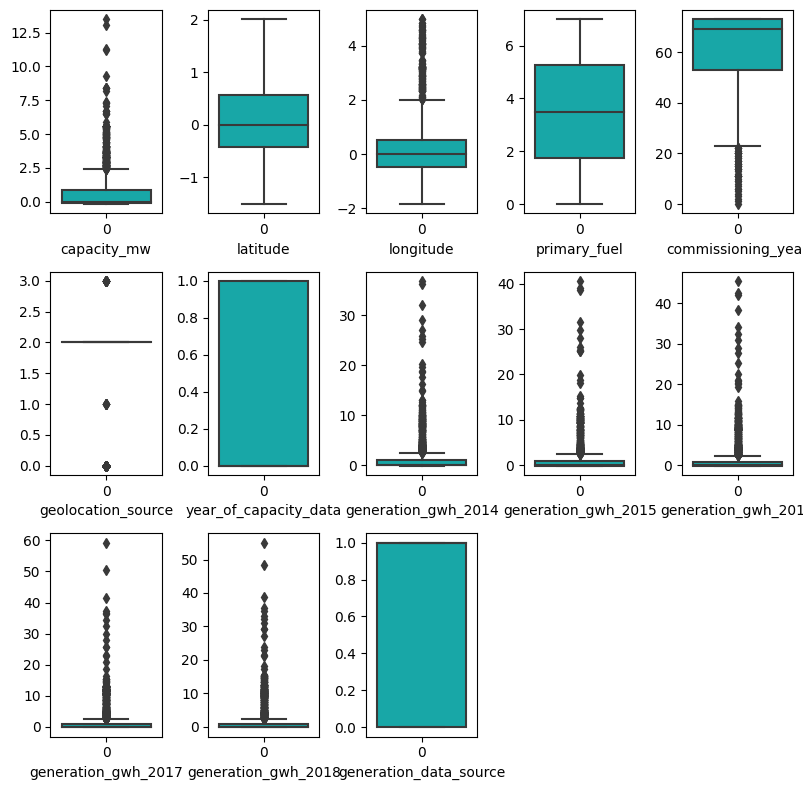

In [23]:
# Visulize outliers using BoxPlot

mp.figure(figsize=(8,8))
pnum = 1

for index in df_pf_bl.columns.to_list():
  if(pnum<=15):
    ax = mp.subplot(3,5, pnum)
    sns.boxplot(df_pf_bl[index], color = 'c')
    mp.xlabel(index)
  pnum = pnum+1

mp.tight_layout()
mp.show()

*Few outliers are seen in various labels*

*Using Z-score to identify and remove outliers*

(2064, 12)
(2064,)


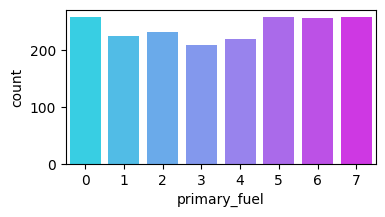

7    258
0    258
5    258
6    256
2    231
1    224
4    219
3    208
Name: primary_fuel, dtype: int64
(1912, 13)


,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
481,-0.039283,0.533826,-0.375372,1,73,2,1,0.194561,0.104213,0.218398,0.048276,0.035376,1
1269,0.195875,-0.371469,2.416926,2,50,2,0,0.473696,0.457439,0.418515,0.342156,0.232069,0
1282,0.112443,0.887929,0.440328,2,61,2,0,-0.113019,-0.086458,-0.061244,-0.131996,-0.165126,0


In [25]:
# Removing Outliers where |Z-score| > 3
# With Loan_status as target

df_pf_tg1 = df_pf_bl['primary_fuel']
df_pf_ft1 = df_pf_bl.drop('primary_fuel', axis =1, inplace = False)

df_pf_fil1 = df_pf_bl[(np.abs(sp.zscore(df_pf_bl)) <= 3).all(axis=1)]

print(df_pf_ft1.shape)
print(df_pf_tg1.shape)

mp.figure(figsize=(4,2))
sns.countplot(x = df_pf_fil1['primary_fuel'], palette = 'cool')
mp.show()

print(df_pf_fil1['primary_fuel'].value_counts())
print(df_pf_fil1.shape)
df_pf_fil1.sample(3)

**Outliers have been removed**

# BIVARIATE ANALYSIS

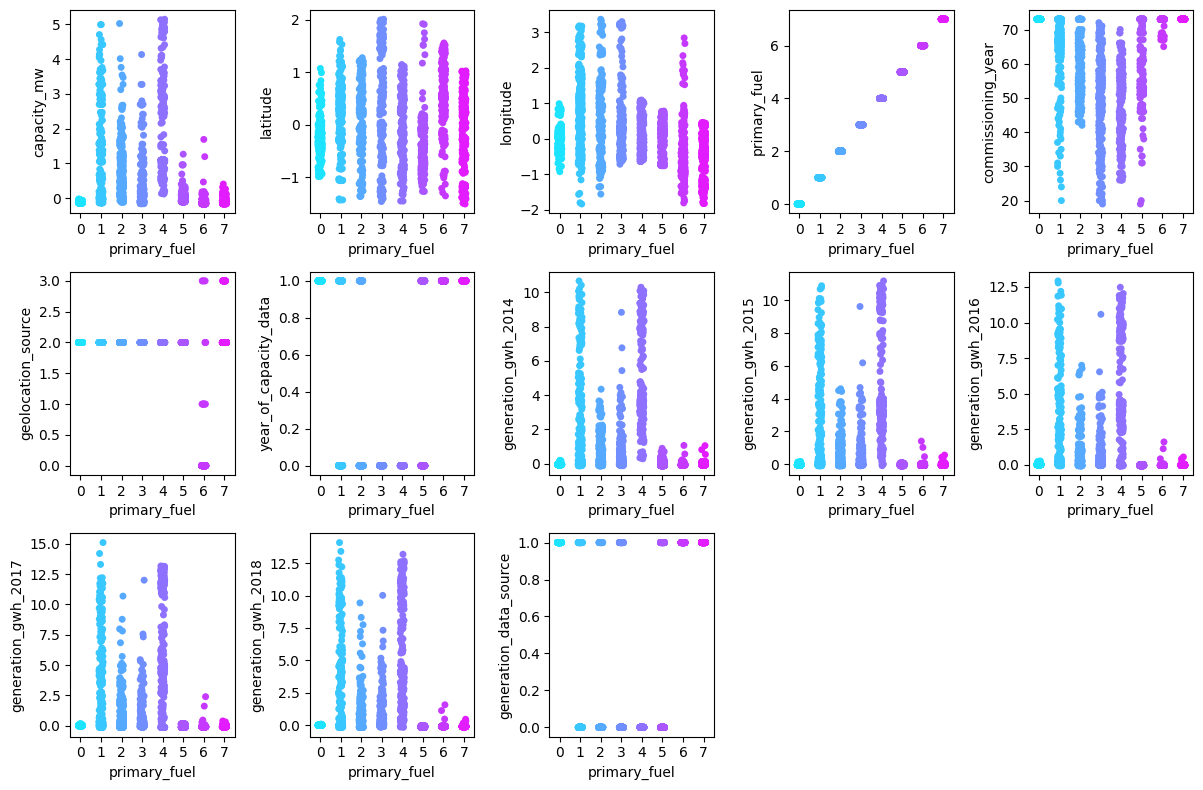

In [26]:
# Stripplpt wrt primary_fuel

mp.figure(figsize=(12,8))
pnum = 1

for index in df_pf_fil1.columns.to_list():
  if(pnum<=15):
    ax = mp.subplot(3,5, pnum)
    sns.stripplot(x=df_pf_fil1['primary_fuel'], y =df_pf_fil1[index], palette = 'cool')
    mp.ylabel(index)
  pnum = pnum+1

mp.tight_layout()
mp.show()

power generation is higher in case of fuel type 4

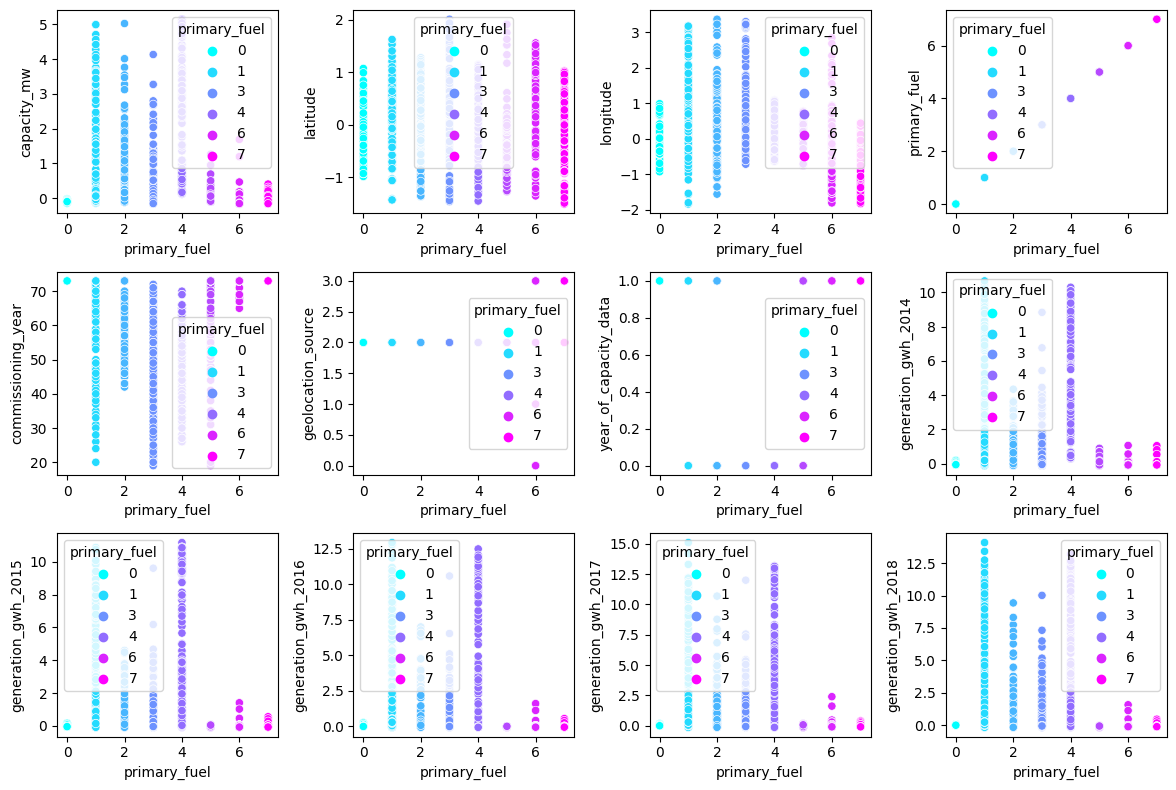

In [27]:
# Scatterplot wrt Primary_Fuel

mp.figure(figsize=(12,8))
pnum = 1

for index in df_pf_fil1.columns.to_list():
  if(pnum<=12):
    ax = mp.subplot(3,4, pnum)
    sns.scatterplot(x=df_pf_fil1['primary_fuel'], y =df_pf_fil1[index], palette = 'cool', hue = df_pf_fil1['primary_fuel'])
    mp.ylabel(index)
  pnum = pnum+1

mp.tight_layout()
mp.show()

Power generation is low in case of fuel type 0 & 6

# Multivariate

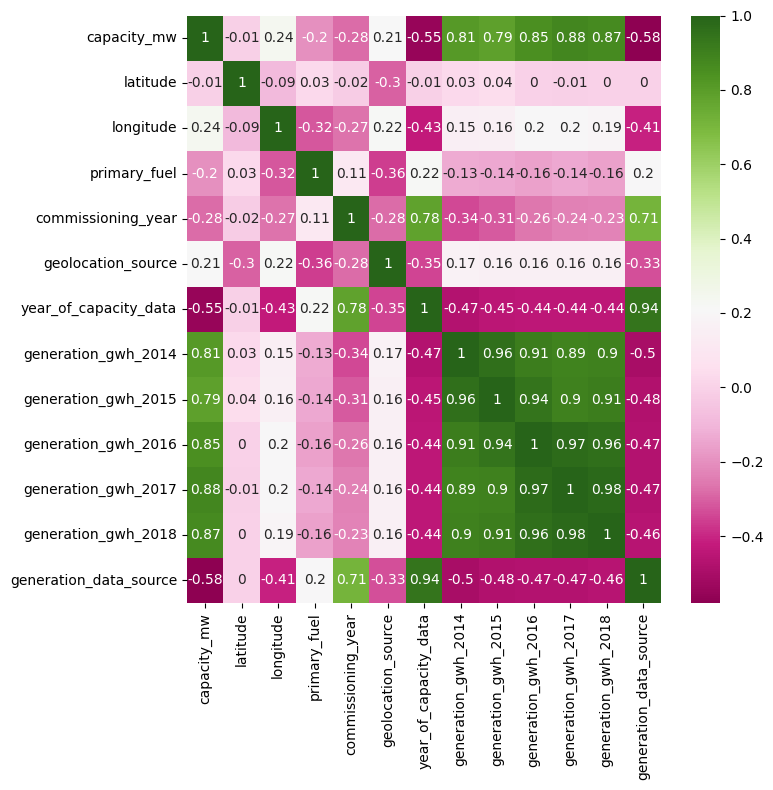

In [28]:
mp.figure(figsize=(8,8))
sns.heatmap(round(df_pf_fil1.corr(),2), cmap = 'PiYG', annot = True)
mp.tight_layout()
mp.show()

Primary fuel is showing lower correlation with other labels

capacity mw  and generation_gwH (all years) are showing string +ve correlation

# Checking Skewness

In [29]:
# Skew

df_pf_fil1.skew()

capacity_mw               2.153904
latitude                  0.162036
longitude                 1.038082
primary_fuel             -0.060342
commissioning_year       -1.117231
geolocation_source       -2.059730
year_of_capacity_data    -0.027221
generation_gwh_2014       2.598749
generation_gwh_2015       2.785055
generation_gwh_2016       2.622557
generation_gwh_2017       2.540587
generation_gwh_2018       2.646735
generation_data_source   -0.153287
dtype: float64

*Applying cuberoot transformation in continous numeric label with absolute skewness greater than 1*

In [30]:
df_pf_fil1['capacity_mw'] = np.cbrt(df_pf_fil1['capacity_mw'])
df_pf_fil1['commissioning_year'] = np.cbrt(df_pf_fil1['commissioning_year'])
df_pf_fil1['generation_gwh_2014'] = np.cbrt(df_pf_fil1['generation_gwh_2014'])
df_pf_fil1['generation_gwh_2015'] = np.cbrt(df_pf_fil1['generation_gwh_2015'])
df_pf_fil1['generation_gwh_2016'] = np.cbrt(df_pf_fil1['generation_gwh_2016'])
df_pf_fil1['generation_gwh_2017'] = np.cbrt(df_pf_fil1['generation_gwh_2017'])
df_pf_fil1['generation_gwh_2018'] = np.cbrt(df_pf_fil1['generation_gwh_2018'])

In [ ]:
df_pf_fil1.skew()

capacity_mw               0.489633
latitude                  0.162036
longitude                 1.038082
primary_fuel             -0.060342
commissioning_year       -1.463036
geolocation_source       -2.059730
year_of_capacity_data    -0.027221
generation_gwh_2014       0.765854
generation_gwh_2015       0.849447
generation_gwh_2016       0.958836
generation_gwh_2017       0.906466
generation_gwh_2018       0.963085
generation_data_source   -0.153287
dtype: float64

*Skewness are within permissible limits*

**Chekcing collinearity using VIF**

In [31]:
# Checking VIF

# Separating Target label Avg Price
df_pf_vf = df_pf_fil1.drop('primary_fuel', axis =1, inplace = False)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Feature'] = df_pf_vf.columns.to_list()
vif['VIF Val'] = [variance_inflation_factor(df_pf_vf.values,i) for i in range(len(df_pf_vf.columns))]

vif

,Feature,VIF Val
0,capacity_mw,8.020176
1,latitude,1.180173
2,longitude,1.344237
3,commissioning_year,17.042366
4,geolocation_source,9.745249
5,year_of_capacity_data,19.022947
6,generation_gwh_2014,11.165116
7,generation_gwh_2015,14.395636
8,generation_gwh_2016,20.232606
9,generation_gwh_2017,14.157083


In [32]:
# Remove Collinearity by dropping High VIF label , ie, generation_data_source

df_pf_vf.drop('generation_data_source', axis=1, inplace = True)
vif = pd.DataFrame()
vif['Feature'] = df_pf_vf.columns.to_list()
vif['VIF Val'] = [variance_inflation_factor(df_pf_vf.values,i) for i in range(len(df_pf_vf.columns))]

vif

,Feature,VIF Val
0,capacity_mw,7.162911
1,latitude,1.174542
2,longitude,1.343252
3,commissioning_year,16.239511
4,geolocation_source,9.682135
5,year_of_capacity_data,6.176357
6,generation_gwh_2014,11.160825
7,generation_gwh_2015,14.375932
8,generation_gwh_2016,19.911898
9,generation_gwh_2017,14.105496


In [33]:
# Remove Collinearity by dropping High VIF label , ie, generation_gwh_2016

df_pf_vf.drop('generation_gwh_2016', axis=1, inplace = True)
vif = pd.DataFrame()
vif['Feature'] = df_pf_vf.columns.to_list()
vif['VIF Val'] = [variance_inflation_factor(df_pf_vf.values,i) for i in range(len(df_pf_vf.columns))]

vif

,Feature,VIF Val
0,capacity_mw,7.115105
1,latitude,1.168587
2,longitude,1.301049
3,commissioning_year,16.239484
4,geolocation_source,9.655631
5,year_of_capacity_data,6.151032
6,generation_gwh_2014,11.053603
7,generation_gwh_2015,11.338657
8,generation_gwh_2017,9.845408
9,generation_gwh_2018,8.862846


In [34]:
# Remove Collinearity by dropping High VIF label , ie, commissioning_year

df_pf_vf.drop('commissioning_year', axis=1, inplace = True)
vif = pd.DataFrame()
vif['Feature'] = df_pf_vf.columns.to_list()
vif['VIF Val'] = [variance_inflation_factor(df_pf_vf.values,i) for i in range(len(df_pf_vf.columns))]

vif

,Feature,VIF Val
0,capacity_mw,6.813236
1,latitude,1.084297
2,longitude,1.274376
3,geolocation_source,3.054786
4,year_of_capacity_data,3.173009
5,generation_gwh_2014,11.052287
6,generation_gwh_2015,11.310155
7,generation_gwh_2017,9.845120
8,generation_gwh_2018,8.778163


In [35]:
# Remove Collinearity by dropping High VIF label , ie, generation_gwh_2015

df_pf_vf.drop('generation_gwh_2015', axis=1, inplace = True)
vif = pd.DataFrame()
vif['Feature'] = df_pf_vf.columns.to_list()
vif['VIF Val'] = [variance_inflation_factor(df_pf_vf.values,i) for i in range(len(df_pf_vf.columns))]

vif

,Feature,VIF Val
0,capacity_mw,6.651626
1,latitude,1.070721
2,longitude,1.269847
3,geolocation_source,3.048695
4,year_of_capacity_data,3.172126
5,generation_gwh_2014,7.482575
6,generation_gwh_2017,9.795295
7,generation_gwh_2018,8.140822


*Multicollinearity has been treated*


# Classification Model

To predict primary_fuel

Separate Independent & Target Label

In [37]:
# Separate independent & target labels

x_dfc = df_pf_vf
y_dfc = df_pf_fil1['primary_fuel']

# Import Libraraies
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint


print(x_dfc.shape)
print(y_dfc.shape)

(1912, 8)
(1912,)


# RANDOM FOREST CLASSIFIER


In [66]:
# Hypertuning RFC Parameters

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
param_dist = {"max_depth": [4, None],
   "max_features": sp_randint(1, 15),
   "min_samples_split": sp_randint(2, 11),
   "criterion": ["gini", "entropy"], "random_state" : range(0, 100)}

samples = 8
randomCV = RandomizedSearchCV(rfc, param_distributions=param_dist, n_iter=samples,cv=5)
randomCV.fit(x_dfc, y_dfc)
print(randomCV.best_params_)

bp_rfc = randomCV.best_params_

{'criterion': 'gini', 'max_depth': None, 'max_features': 3, 'min_samples_split': 2, 'random_state': 10}


In [67]:
# Training the RFC Model with given best hypertuning parameters

RFC = RandomForestClassifier(criterion = bp_rfc['criterion'], max_depth = bp_rfc['max_depth'], max_features = bp_rfc['max_features'], min_samples_split = bp_rfc['min_samples_split'], random_state =bp_rfc['random_state'])
max_acc = 0
rst_rfc = 0

for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x_dfc, y_dfc, random_state = i, test_size = 0.2)
  RFC.fit(x_train, y_train)
  pred = RFC.predict(x_test)

  acc = accuracy_score(y_test, pred)

  if (acc > max_acc):
    max_acc = acc
    rst_rfc = i

print('Best Random State:', rst_rfc, 'with accuracy score:', max_acc)

Best Random State: 63 with accuracy score: 0.95822454308094


# 2. Extra Trees Classifier


In [68]:
# Hypertuning Parameters

from sklearn.tree import ExtraTreeClassifier

etc = ExtraTreeClassifier()
param_dist = {"max_depth": [4, None],
   "max_features": sp_randint(1, 15),
   "min_samples_split": sp_randint(2, 11),
   "criterion": ["gini", "entropy"], "random_state" : range(0, 100)}

samples = 8
randomCV = RandomizedSearchCV(etc, param_distributions=param_dist, n_iter=samples,cv=5)
randomCV.fit(x_dfc, y_dfc)
print(randomCV.best_params_)

bp_etc = randomCV.best_params_

{'criterion': 'entropy', 'max_depth': None, 'max_features': 9, 'min_samples_split': 2, 'random_state': 73}


In [69]:
# Training the ETC  Model with given best hypertuning parameters
ETC = ExtraTreeClassifier(criterion = bp_etc['criterion'], max_depth = bp_etc['max_depth'], max_features = bp_etc['max_features'], min_samples_split = bp_etc['min_samples_split'], random_state = bp_etc['random_state'] )
max_acc = 0
rst_etc = 0

for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x_dfc, y_dfc, random_state = i, test_size = 0.2)
  ETC.fit(x_train, y_train)
  pred = ETC.predict(x_test)

  acc = accuracy_score(y_test, pred)

  if (acc > max_acc):
    max_acc = acc
    rst_etc = i

print('Best Random State:', rst_etc, 'with accuracy score:', max_acc)


Best Random State: 41 with accuracy score: 0.9216710182767625


# 3. Decision Tree Classifer

In [70]:
# Hypertuning Parameters

from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
param_dist = {"max_depth": [4, None],
   "max_features": sp_randint(1, 15),
   "min_samples_split": sp_randint(2, 11),
   "criterion": ["gini", "entropy"], "random_state" : range(0, 100)}

samples = 8
randomCV = RandomizedSearchCV(dtc, param_distributions=param_dist, n_iter=samples,cv=5)
randomCV.fit(x_dfc, y_dfc)
print(randomCV.best_params_)

bp_dtc = randomCV.best_params_

{'criterion': 'gini', 'max_depth': None, 'max_features': 10, 'min_samples_split': 7, 'random_state': 28}


In [71]:
# Training the DTC  Model with given best hypertuning parameters
DTC = DecisionTreeClassifier(criterion = bp_dtc['criterion'], max_depth = bp_dtc['max_depth'], max_features = bp_dtc['max_features'], min_samples_split = bp_dtc['min_samples_split'], random_state = bp_dtc['random_state'] )
max_acc = 0
rst_dtc = 0

for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x_dfc, y_dfc, random_state = i, test_size = 0.2)
  DTC.fit(x_train, y_train)
  pred = DTC.predict(x_test)

  acc = accuracy_score(y_test, pred)

  if (acc > max_acc):
    max_acc = acc
    rst_dtc = i

print('Best Random State:', rst_dtc, 'with accuracy score:', max_acc)

Best Random State: 68 with accuracy score: 0.9242819843342036


# 4. KNN Model

Hypertuning Parameters

In [72]:
# Hypertuning Parameters

from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier()

param = {"n_neighbors": [3,5,7],
   "weights": ['uniform', 'distance'],
   "p": [1,2]}

samples = 8
randomCV = RandomizedSearchCV(knc, param_distributions=param, n_iter = samples,cv=5)
randomCV.fit(x_dfc, y_dfc)
print(randomCV.best_params_)

bp_knc = randomCV.best_params_

{'weights': 'distance', 'p': 1, 'n_neighbors': 5}


In [73]:
# Training KNN Model

max_acc = 0
rst_knc = 0
KNN = KNeighborsClassifier(weights = bp_knc['weights'], p = bp_knc['p'], n_neighbors = bp_knc['n_neighbors'])

for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x_dfc, y_dfc, random_state = i, test_size = 0.2)

  KNN.fit(x_train, y_train)
  pred = KNN.predict(x_test)

  acc = accuracy_score(y_test, pred)

  if (acc > max_acc):
    max_acc = acc
    rst_knc = i

print('Best Random State:', rst_knc, 'with accuracy score:', max_acc)

Best Random State: 8 with accuracy score: 0.9242819843342036


#4. SVC

In [74]:
# Hypertuning parameters

from sklearn.svm import SVC

svc = SVC()
param = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['linear','rbf', 'poly', 'sigmoid']}

samples = 8
randomCV = RandomizedSearchCV(svc, param_distributions=param, n_iter = samples,cv=5)
randomCV.fit(x_dfc, y_dfc)
print(randomCV.best_params_)

bp_svc = randomCV.best_params_

{'kernel': 'rbf', 'gamma': 0.1, 'C': 100}


In [75]:
# Training SVC Model

max_acc = 0
rst_sv = 0
SV = SVC(C = bp_svc['C'], kernel = bp_svc['kernel'], gamma = bp_svc['gamma'])

for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x_dfc, y_dfc, random_state = i, test_size = 0.2)

  SV.fit(x_train, y_train)
  pred = SV.predict(x_test)

  acc = accuracy_score(y_test, pred)

  if (acc > max_acc):
    max_acc = acc
    rst_sv = i

print('Best Random State:', rst_sv, 'with accuracy score:', max_acc)

Best Random State: 8 with accuracy score: 0.9321148825065274


#5. ADABOOST CLASSIFIERS

In [76]:
# Hypertuning Parameters

from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier()

param = {"n_estimators": sp_randint(1, 100),
   "learning_rate": sp_randint(1, 15),
   "algorithm": ['SAMME.R', 'SAMME'],
    "random_state" : range(0, 100)}

samples = 8
randomCV = RandomizedSearchCV(abc, param_distributions=param, n_iter = samples,cv=5)
randomCV.fit(x_dfc, y_dfc)
print(randomCV.best_params_)

bp_abc = randomCV.best_params_

{'algorithm': 'SAMME.R', 'learning_rate': 7, 'n_estimators': 42, 'random_state': 60}


In [77]:
# Training ABC Model

max_acc = 0
rst_abc = 0
ABC = AdaBoostClassifier(n_estimators = bp_abc['n_estimators'], learning_rate = bp_abc['learning_rate'],
                         algorithm = bp_abc['algorithm'],random_state = bp_abc['random_state'] )

for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x_dfc, y_dfc, random_state = i, test_size = 0.2)

  ABC.fit(x_train, y_train)
  pred = ABC.predict(x_test)

  acc = accuracy_score(y_test, pred)

  if (acc > max_acc):
    max_acc = acc
    rst_abc = i

print('Best Random State:', rst_abc, 'with accuracy score:', max_acc)

Best Random State: 76 with accuracy score: 0.6109660574412533


# 6. XGBOOST CLASSIFIERS

In [78]:
# Hypertuning Parameters

import xgboost as xg

xgb = xg.XGBClassifier()

param = {"n_estimators": sp_randint(1, 100),
   "learning_rate": [0.1,0.4, 0.7,1],
   "boosters": ['gbtree', 'dart ', 'gpu_hist '],
    "objective":['multi:softmax', 'multi:softprob'],
    "random_state" : range(0, 100), 'verbosity' : [0]}

samples = 8
randomCV = RandomizedSearchCV(xgb, param_distributions=param, n_iter = samples,cv=5)
randomCV.fit(x_dfc, y_dfc)
print(randomCV.best_params_)

bp_xgc = randomCV.best_params_

{'boosters': 'dart ', 'learning_rate': 0.4, 'n_estimators': 83, 'objective': 'multi:softmax', 'random_state': 44, 'verbosity': 0}


In [79]:
# Training XGB Model

max_acc = 0
rst_abc = 0
XGC = xg.XGBClassifier(n_estimators = bp_xgc['n_estimators'], learning_rate = bp_xgc['learning_rate'],
                         boosters = bp_xgc['boosters'],random_state = bp_xgc['random_state'], objective = bp_xgc['objective'], verbosity = 0)

for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x_dfc, y_dfc, random_state = i, test_size = 0.2)

  XGC.fit(x_train, y_train)
  pred = XGC.predict(x_test)

  acc = accuracy_score(y_test, pred)

  if (acc > max_acc):
    max_acc = acc
    rst_xgc = i

print('Best Random State:', rst_xgc, 'with accuracy score:', max_acc)

Best Random State: 13 with accuracy score: 0.9556135770234987


# Summary

1. Random Forest shows highest accuracy followed by XGBoost
2. rest other models are giving slightly lower accuracy

# Checking CV Scores of the Models

In [80]:
# Checking CV Score

from sklearn.model_selection import cross_val_score

cv = 5
model_list = [RFC, ETC, KNN, SV, ABC, XGC]
cv_score_list = []

for mdl in model_list:
  cvs = cross_val_score(mdl, x_dfc,y_dfc)
  print(mdl, ': Avg CV Score is ', round(cvs.mean(),4))
  print('\n')

RandomForestClassifier(max_features=3, random_state=10) : Avg CV Score is  0.9294


ExtraTreeClassifier(criterion='entropy', max_features=9, random_state=73) : Avg CV Score is  0.8802


KNeighborsClassifier(p=1, weights='distance') : Avg CV Score is  0.8985


SVC(C=100, gamma=0.1) : Avg CV Score is  0.9027


AdaBoostClassifier(learning_rate=7, n_estimators=42, random_state=60) : Avg CV Score is  0.4337


XGBClassifier(base_score=None, booster=None, boosters='dart ', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child

**On basis of accuracy score and avg CV scores, randomForestClassifier is selected**

# Checking accuracy, score, confusion matrix & classsification reports for RandomforestClassifier

In [81]:
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, classification_report, confusion_matrix

RFC_SEL = RandomForestClassifier(criterion = bp_rfc['criterion'], max_depth = bp_rfc['max_depth'], max_features = bp_rfc['max_features'], min_samples_split = bp_rfc['min_samples_split'], random_state =bp_rfc['random_state'])

x_train, x_test, y_train, y_test = train_test_split(x_dfc, y_dfc, random_state = rst_rfc, test_size = 0.2)
RFC_SEL.fit(x_train, y_train)
pred = RFC_SEL.predict(x_test)

acc_score = accuracy_score(y_test, pred)
print('Accuracy of the Model:', round(acc_score,4))
print('\n')

print('Confusion Matrix:', '\n',confusion_matrix(y_test, pred))
print('\n')

print('Classification Report:', '\n',classification_report(y_test, pred))
print('\n')

Accuracy of the Model: 0.9582


Confusion Matrix: 
 [[54  0  0  0  0  0  0  0]
 [ 1 37  0  1  2  0  0  0]
 [ 0  3 49  2  0  0  0  0]
 [ 0  3  2 37  0  0  0  0]
 [ 0  0  0  0 45  0  0  0]
 [ 0  0  0  0  0 46  0  0]
 [ 0  1  0  0  0  0 44  0]
 [ 0  0  0  0  0  1  0 55]]


Classification Report: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        54
           1       0.84      0.90      0.87        41
           2       0.96      0.91      0.93        54
           3       0.93      0.88      0.90        42
           4       0.96      1.00      0.98        45
           5       0.98      1.00      0.99        46
           6       1.00      0.98      0.99        45
           7       1.00      0.98      0.99        56

    accuracy                           0.96       383
   macro avg       0.96      0.96      0.96       383
weighted avg       0.96      0.96      0.96       383





# Checking AUC-ROC Curve

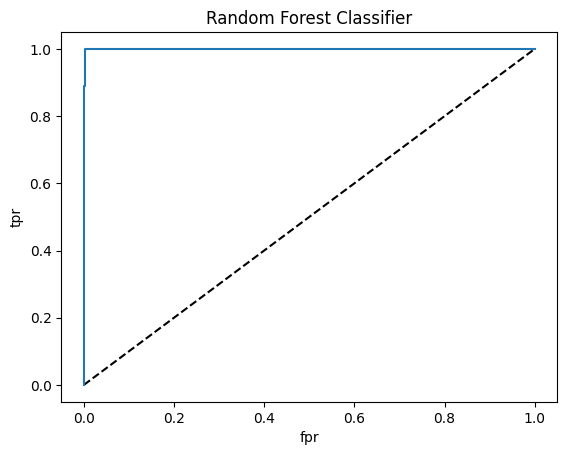

In [82]:
# Checking ROC_AUC Curve

y_pred_prob = RFC_SEL.predict_proba(x_test)[:, 0]

# 0 & others

fpr, tpr, threshold = roc_curve(y_test, y_pred_prob, pos_label = 0)

import matplotlib.pyplot as mpp

mp.plot([0,1],[0,1], 'k--')
mp.xlabel('fpr')
mp.ylabel('tpr')
mp.title('Random Forest Classifier')
mp.plot(fpr,tpr)
mp.show()

# Part-2 Model for Predicting capacity_mw

# Non graphical Analysis

Directly useing null treated dataset

In [83]:
# Directly using the dataset after removing null values

df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   capacity_mw             907 non-null    float64
 1   latitude                907 non-null    float64
 2   longitude               907 non-null    float64
 3   primary_fuel            907 non-null    int64  
 4   commissioning_year      907 non-null    int64  
 5   geolocation_source      907 non-null    int64  
 6   year_of_capacity_data   907 non-null    int64  
 7   generation_gwh_2014     907 non-null    float64
 8   generation_gwh_2015     907 non-null    float64
 9   generation_gwh_2016     907 non-null    float64
 10  generation_gwh_2017     907 non-null    float64
 11  generation_gwh_2018     907 non-null    float64
 12  generation_data_source  907 non-null    int64  
dtypes: float64(8), int64(5)
memory usage: 92.2 KB


In [84]:
df_raw.sample(3)

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
263,34.4,15.3654,75.5639,7,73,2,1,52.104696,16.271337,14.238039,32.346256,38.847785,1
761,5.0,23.3585,70.6206,6,73,0,1,32.237369,13.333869,7.932161,24.655503,34.409189,1
353,800.0,31.3820,76.8761,3,69,2,0,0.250000,2297.057000,3209.034200,3297.051900,2998.860350,0


**Check Statistical Summary**

In [85]:
# Statistical Summary

df_raw.describe()


,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.186817,77.456095,3.206174,60.325248,1.754135,0.427784,1142.824559,1169.654091,1221.194245,1278.277911,1331.518356,0.504961
std,590.085456,6.148171,4.898471,2.280652,16.710661,0.700183,0.495030,2909.801036,3094.329534,3121.516551,3176.416749,3287.715637,0.500251
min,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,16.855550,74.261750,1.000000,52.000000,2.000000,0.000000,34.612832,13.830540,12.993865,24.655503,34.409189,0.000000
50%,59.200000,21.776600,76.713700,3.000000,68.000000,2.000000,0.000000,108.872900,95.250952,65.584198,88.377423,105.063671,1.000000
75%,385.250000,25.386100,79.406850,6.000000,73.000000,2.000000,1.000000,728.228679,661.829475,737.205450,769.224550,702.196375,1.000000
max,4760.000000,34.649000,95.408000,7.000000,73.000000,3.000000,1.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,1.000000


**Applying Robust Scalar to treat high Std Dev**

In [86]:
# Applying Robust Scalar

# Create a RobustScaler object
scaler = RobustScaler()
df_cm_raw = df_raw

# Columns to Scale
columns_to_scale = ['latitude','longitude','commissioning_year', 'generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']

# Create a DataFrame containing with selected columns
df_cm_feat = df_cm_raw[columns_to_scale]

# Scaleing
df_cm_sca = pd.DataFrame(scaler.fit_transform(df_cm_feat), columns=columns_to_scale)

# Reset the index of df_raw
df_cm_raw.reset_index(drop=True, inplace=True)

# Replace scaled columns
df_cm_raw[columns_to_scale] = df_cm_sca

# Print information about the scaled DataFrame and check for NaN values and standard deviations
print(df_cm_raw.shape)
print(df_cm_raw.isnull().sum())
print(df_cm_raw.std())

(907, 13)
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
commissioning_year        0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    0
dtype: int64
capacity_mw               590.085456
latitude                    0.720724
longitude                   0.952065
primary_fuel                2.280652
commissioning_year          0.795746
geolocation_source          0.700183
year_of_capacity_data       0.495030
generation_gwh_2014         4.195119
generation_gwh_2015         4.775208
generation_gwh_2016         4.310227
generation_gwh_2017         4.266114
generation_gwh_2018         4.923298
generation_data_source      0.500251
dtype: float64


**Removing Outliers using Z-score**

In [87]:
# Removing Outliers where |Z-score| > 3
# With Loan_status as target

df_cm_ft1 = df_cm_raw.iloc[:, 1:]
df_cm_tg1 = df_cm_raw['capacity_mw']

df_cm_fil1 = df_cm_raw[(np.abs(sp.zscore(df_cm_ft1)) <= 3).all(axis=1)]

print(df_cm_fil1.shape)

(861, 13)


**Outliers have been removed using z-score**

In [88]:
df_cm_fil1.describe()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
count,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000,861.000000
mean,278.463927,-0.073098,0.078103,3.262485,-0.316465,1.743322,0.449477,1.031146,1.130821,1.126434,1.147324,1.320177,0.521487
std,452.452124,0.722981,0.871206,2.313429,0.741698,0.713877,0.497730,2.362455,2.586584,2.424073,2.483555,2.914939,0.499828
min,0.000000,-1.595173,-1.568288,0.000000,-2.714286,0.000000,0.000000,-0.156964,-0.146992,-0.090559,-0.118696,-0.157331,0.000000
25%,16.500000,-0.579857,-0.490933,1.000000,-0.714286,2.000000,0.000000,-0.110487,-0.126415,-0.079607,-0.085582,-0.105804,0.000000
50%,51.000000,-0.013903,-0.036598,3.000000,0.047619,2.000000,0.000000,-0.020838,-0.021913,-0.010656,-0.008754,0.000000,1.000000
75%,330.000000,0.407195,0.470525,6.000000,0.238095,2.000000,1.000000,0.720483,0.766667,0.829641,0.743376,0.754606,1.000000
max,2520.000000,1.508977,2.967348,7.000000,0.238095,3.000000,1.000000,13.301494,14.440994,13.561804,12.333621,16.583856,1.000000


Std Dev is within acceptable limits after scaling & removing outliers

In [89]:
# Checking Skewness

df_cm_fil1.skew()

capacity_mw               2.202832
latitude                 -0.119625
longitude                 0.946876
primary_fuel              0.421343
commissioning_year       -1.375829
geolocation_source       -1.848337
year_of_capacity_data     0.203485
generation_gwh_2014       2.740828
generation_gwh_2015       2.590976
generation_gwh_2016       2.506256
generation_gwh_2017       2.428960
generation_gwh_2018       2.519391
generation_data_source   -0.086176
dtype: float64

**Applying Cuberoot Transformation to remove skewness**

In [90]:
# Applying cuberoot transformation on continous labels where skewness is high and not within acceptable limits <=1, also check std deviation

df_cm_fil1['commissioning_year'] = np.cbrt(df_cm_fil1['commissioning_year'])
df_cm_fil1['generation_gwh_2014'] = np.cbrt(df_cm_fil1['generation_gwh_2014'])
df_cm_fil1['generation_gwh_2015'] = np.cbrt(df_cm_fil1['generation_gwh_2015'])
df_cm_fil1['generation_gwh_2016'] = np.cbrt(df_cm_fil1['generation_gwh_2016'])
df_cm_fil1['generation_gwh_2017'] = np.cbrt(df_cm_fil1['generation_gwh_2017'])
df_cm_fil1['generation_gwh_2018'] = np.cbrt(df_cm_fil1['generation_gwh_2018'])

df_cm_fil1.skew()


capacity_mw               2.202832
latitude                 -0.119625
longitude                 0.946876
primary_fuel              0.421343
commissioning_year       -0.285052
geolocation_source       -1.848337
year_of_capacity_data     0.203485
generation_gwh_2014       0.683778
generation_gwh_2015       0.758770
generation_gwh_2016       0.719424
generation_gwh_2017       0.742603
generation_gwh_2018       0.765591
generation_data_source   -0.086176
dtype: float64

*skewness has been treated*

checking multicollinearity using VIF

In [91]:
# Checking VIF

# Separating Target label Avg Price
df_cm_vf = df_cm_fil1.drop('capacity_mw', axis =1, inplace = False)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Feature'] = df_cm_vf.columns.to_list()
vif['VIF Val'] = [variance_inflation_factor(df_cm_vf.values,i) for i in range(len(df_cm_vf.columns))]

vif

,Feature,VIF Val
0,latitude,1.100413
1,longitude,1.329845
2,primary_fuel,4.128603
3,commissioning_year,3.860329
4,geolocation_source,4.892265
5,year_of_capacity_data,15.883742
6,generation_gwh_2014,7.315331
7,generation_gwh_2015,9.669262
8,generation_gwh_2016,16.279370
9,generation_gwh_2017,18.512656


In [92]:
# Remove Collinearity by dropping High VIF label , ie, generation_gwh_2017

df_cm_vf.drop('generation_gwh_2017', axis=1, inplace = True)
vif = pd.DataFrame()
vif['Feature'] = df_cm_vf.columns.to_list()
vif['VIF Val'] = [variance_inflation_factor(df_cm_vf.values,i) for i in range(len(df_cm_vf.columns))]

vif

,Feature,VIF Val
0,latitude,1.100357
1,longitude,1.328586
2,primary_fuel,3.922230
3,commissioning_year,3.839244
4,geolocation_source,4.892102
5,year_of_capacity_data,15.852468
6,generation_gwh_2014,7.091381
7,generation_gwh_2015,9.657667
8,generation_gwh_2016,14.993315
9,generation_gwh_2018,9.476080


In [93]:
# Remove Collinearity by dropping High VIF label , ie, year_of_capacity_data

df_cm_vf.drop('year_of_capacity_data', axis=1, inplace = True)
vif = pd.DataFrame()
vif['Feature'] = df_cm_vf.columns.to_list()
vif['VIF Val'] = [variance_inflation_factor(df_cm_vf.values,i) for i in range(len(df_cm_vf.columns))]

vif

,Feature,VIF Val
0,latitude,1.094965
1,longitude,1.296323
2,primary_fuel,3.424493
3,commissioning_year,1.982395
4,geolocation_source,4.805366
5,generation_gwh_2014,6.876311
6,generation_gwh_2015,9.655451
7,generation_gwh_2016,14.992892
8,generation_gwh_2018,9.475874
9,generation_data_source,5.068085


In [94]:
# Remove Collinearity by dropping High VIF label , ie, generation_gwh_2016

df_cm_vf.drop('generation_gwh_2016', axis=1, inplace = True)
vif = pd.DataFrame()
vif['Feature'] = df_cm_vf.columns.to_list()
vif['VIF Val'] = [variance_inflation_factor(df_cm_vf.values,i) for i in range(len(df_cm_vf.columns))]

vif

,Feature,VIF Val
0,latitude,1.080412
1,longitude,1.280432
2,primary_fuel,3.424410
3,commissioning_year,1.976380
4,geolocation_source,4.677511
5,generation_gwh_2014,6.775302
6,generation_gwh_2015,7.671824
7,generation_gwh_2018,5.737518
8,generation_data_source,5.049614


**Remaining VIF can be considered within acceptable limits**

# MODELLING to predict capacity in MW

*Separate Independent & target Variable*

In [95]:
# Separate independent & target labels

x_dfr = df_cm_vf
y_dfr = df_cm_fil1['capacity_mw']

# Import Libraraies
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint


print(x_dfr.shape)
print(y_dfr.shape)

(861, 9)
(861,)


In [96]:
# Import Libraries

from sklearn.linear_model import Lasso, Ridge, LinearRegression, ElasticNet
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint


In [97]:
# Hypertuning various models

ls = Lasso()
rd = Ridge()
en = ElasticNet()

mdl = [ls, rd, en]

param = {"alpha": [0.001, 0.01, 0.1,1,10], "random_state": range(1,100)}

samples = 8
bs_prm = []

for mod in mdl:
  randomCV = RandomizedSearchCV(mod, param_distributions=param, n_iter=samples,cv=5)
  randomCV.fit(x_dfr, y_dfr)
  print(mod, randomCV.best_params_)
  bs_prm.append(randomCV.best_params_)

Lasso() {'random_state': 8, 'alpha': 1}
Ridge() {'random_state': 92, 'alpha': 10}
ElasticNet() {'random_state': 5, 'alpha': 0.1}


**Checking Metrics**

In [98]:
from sklearn.metrics import  mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score

min_mse = 999999999999999999999999
bs_prm

[{'random_state': 8, 'alpha': 1},
 {'random_state': 92, 'alpha': 10},
 {'random_state': 5, 'alpha': 0.1}]

*Checking Metrics of Lasso*

In [99]:
# Chekcing Metrics of Lasso

bsp = bs_prm[0]
LS = Lasso(random_state = bsp['random_state'], alpha = bsp['alpha'])

bst_rs_ls = 0

for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x_dfr, y_dfr, random_state = i, test_size = 0.2)
  LS.fit(x_train, y_train)
  predict = LS.predict(x_test)
  msq_err = mean_squared_error(y_test, predict)
  r2_sc = r2_score(y_test, predict)

  if(msq_err <= min_mse):
    min_mse = msq_err
    bst_rs_ls = i

print("Least MSE at random state = ", bst_rs_ls, 'mse:',min_mse, "r2_scr:", r2_sc)

Least MSE at random state =  75 mse: 40416.71924741629 r2_scr: 0.62471671201718


*Checking Metrics of Ridge*

In [100]:
# Applying Ridge with hypertuned parameters

bsp = bs_prm[1]
RG = Ridge(random_state = bsp['random_state'], alpha = bsp['alpha'])

bst_rs_rd = 0

for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x_dfr, y_dfr, random_state = i, test_size = 0.2)
  RG.fit(x_train, y_train)
  predict = RG.predict(x_test)
  msq_err = mean_squared_error(y_test, predict)
  r2_sc = r2_score(y_test, predict)

  if(msq_err <= min_mse):
    min_mse = msq_err
    bst_rs = i

print("Least MSE at random state = ", bst_rs_rd, 'mse:',min_mse, "r2_scr:", r2_sc)

Least MSE at random state =  0 mse: 39925.872239033895 r2_scr: 0.624135333013216


*Checking Metrics of ElasticNet*

In [101]:
# Applying ElasticNet with hypertuned parameters

bsp = bs_prm[2]
EN = ElasticNet(random_state = bsp['random_state'], alpha = bsp['alpha'])

bst_rs_en = 0

for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x_dfr, y_dfr, random_state = i, test_size = 0.2)
  EN.fit(x_train, y_train)
  predict = EN.predict(x_test)
  msq_err = mean_squared_error(y_test, predict)
  r2_sc = r2_score(y_test, predict)

  if(msq_err <= min_mse):
    min_mse = msq_err
    bst_rs = i

print("Least MSE at random state = ", bst_rs_en, 'mse:',min_mse, "r2_scr:", r2_sc)

Least MSE at random state =  0 mse: 38577.06402275446 r2_scr: 0.6198727264827966


*Checking Metrics of RandomForestRegressor*

In [102]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

param = {"criterion": ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'], "random_state": range(1,100), 'max_features' :['sqrt','log2','None']}

randomCV = RandomizedSearchCV(rfr, param_distributions=param, n_iter=samples,cv=5)
randomCV.fit(x_dfr, y_dfr)
print(rfr, randomCV.best_params_)
bs_prm = (randomCV.best_params_)

RandomForestRegressor() {'random_state': 24, 'max_features': 'log2', 'criterion': 'absolute_error'}


In [103]:
# Applying RFR with hypertuned parameters

RFR = RandomForestRegressor(random_state = bs_prm['random_state'], max_features = bs_prm['max_features'], criterion = bs_prm['criterion'])

bst_rs = 0

for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x_dfr, y_dfr, random_state = i, test_size = 0.2)
  RFR.fit(x_train, y_train)
  predict = RFR.predict(x_test)
  msq_err = mean_squared_error(y_test, predict)
  r2_sc = r2_score(y_test, predict)

  if(msq_err <= min_mse):
    min_mse = msq_err
    bst_rs = i

print("Least MSE at random state = ", bst_rs, 'mse:',min_mse, "r2_scr:", r2_sc)

Least MSE at random state =  75 mse: 13082.839059676906 r2_scr: 0.8442166855892547


*XGBOOST REGRESSOR*

In [106]:
import xgboost as xg
import warnings
warnings.filterwarnings('ignore')

param = {"booster":["gblinear","squarederror"], "objective":["reg:linear", "reg:squarederror"],"verbosity": [0] }

xgr = xg.XGBRegressor()

randomCV = RandomizedSearchCV(xgr, param_distributions=param, n_iter=samples,cv=5)
randomCV.fit(x_dfr, y_dfr)
bs_prm = (randomCV.best_params_)

bs_prm

{'verbosity': 0, 'objective': 'reg:squarederror', 'booster': 'gblinear'}

*XBOOST REGRESSOR*

In [107]:
# Applying XGBoost with hypertuned parameters


XGR = xg.XGBRegressor(objective = bs_prm['objective'], booster = bs_prm['booster'],verbosity = 0)

bst_rs = 0

for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x_dfr, y_dfr, random_state = i, test_size = 0.2)
  XGR.fit(x_train, y_train)
  predict = XGR.predict(x_test)
  msq_err = mean_squared_error(y_test, predict)
  r2_sc = r2_score(y_test, predict)

  if(msq_err <= min_mse):
    min_mse = msq_err
    bst_rs = i

print("Least MSE at random state = ", bst_rs, 'mse:',min_mse, "r2_scr:", r2_sc)

Least MSE at random state =  0 mse: 13082.839059676906 r2_scr: 0.6255220610994672


# Checking CV Scores

In [108]:
from sklearn.model_selection import cross_val_score

cv = 5

model_list = [LS, RG, EN, RFR, XGR]
cv_score_list = []

for mdl in model_list:
  cvs = cross_val_score(mdl, x_dfr,y_dfr)
  print(mdl, '\n' ': Avg CV Score is ', cvs.mean(),'\n' )
  cv_score_list.append(cvs.mean())

Lasso(alpha=1, random_state=8) 
: Avg CV Score is  0.6253280810371713 

Ridge(alpha=10, random_state=92) 
: Avg CV Score is  0.6274721237009592 

ElasticNet(alpha=0.1, random_state=5) 
: Avg CV Score is  0.6294600277130071 

RandomForestRegressor(criterion='absolute_error', max_features='log2',
                      random_state=24) 
: Avg CV Score is  0.8479408335797597 

XGBRegressor(base_score=None, booster='gblinear', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None

**On basis of Avg CV Score and r2 score: Random Forest Regressor is selected**

# SAVING THE BEST MODELS FOR BOTH CASES & CHECKING THE OUTPUT

In [109]:
# Saving the best Model

import joblib

# Save Model to predict Primary Fuel
joblib.dump(RFC_SEL, 'RFC_PF.pkl')

# Save Model to capaicty_mw
joblib.dump(RFR, 'gpp_cp.pkl')

['gpp_cp.pkl']

In [110]:
# Load the saved model

# Load Primary Fuel Model
load_RFC_PF = joblib.load('RFC_PF.pkl')
RFC_PF = load_RFC_PF

# Load Capacity-MW Model
load_gpp_cp = joblib.load('gpp_cp.pkl')
gpp_cp = load_gpp_cp

In [111]:
# Predictor Function to predict Primary Fuel

def pred_pf(input):

  inp = np.array(input)
  type_pf  =  RFC_PF.predict(inp.reshape(1, -1))
  reg_pf = le.inverse_transform(type_pf)
  pred_lst = [type_pf, reg_pf]

  return pred_lst

# Predictor Function to predict Capacity_MW

def pred_gpp_cp(input):
  inp = np.array(input)
  pred_cap  =  gpp_cp.predict(inp.reshape(1, -1))

  return pred_cap

In [119]:
# Checking the predictions

rws = [31, 54, 97, 103, 190]
for row in rws:
  print(row, "\n")

  print('Actual capacity_mw', y_dfr.iloc[row] , 'Capacity_MW Predicted by Model:', pred_gpp_cp(x_dfr.iloc[row,:])[0])
  print('Actual Primary-Fuel:', y_dfc.iloc[row] , 'Primary-FuelPredicted by Model:', pred_pf(x_dfc.iloc[row,:])[0], pred_pf(x_dfc.iloc[row,:])[1])
  print('\n')

31 

Actual capacity_mw 5.0 Capacity_MW Predicted by Model: 4.99
Actual Primary-Fuel: 6 Primary-FuelPredicted by Model: [6] ['Solar']


54 

Actual capacity_mw 20.0 Capacity_MW Predicted by Model: 21.936499999999995
Actual Primary-Fuel: 1 Primary-FuelPredicted by Model: [1] ['Coal']


97 

Actual capacity_mw 600.0 Capacity_MW Predicted by Model: 610.03914
Actual Primary-Fuel: 7 Primary-FuelPredicted by Model: [7] ['Wind']


103 

Actual capacity_mw 40.0 Capacity_MW Predicted by Model: 40.772
Actual Primary-Fuel: 1 Primary-FuelPredicted by Model: [1] ['Coal']


190 

Actual capacity_mw 28.2 Capacity_MW Predicted by Model: 27.012999999999984
Actual Primary-Fuel: 3 Primary-FuelPredicted by Model: [3] ['Hydro']


